# Machine Learning Assignment (`sklearn`)

For this assignment we are going to explore both Linear Regression and Logistic Regression. In class I talked about some of the more theoretical ideas around these algorithms (don't worry that will be the  last time I do this!). But hopefully in this assignment you can see the python implementation of the theory we covered. 

Note: The first question is pretty difficult but the purpose of it is to help you understand how the gradient descent algorithm works. However if you find yourself struggling with this question feel free to message the discord. 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression 

The data we will be using for this assignment is the Miami Housing dataset from kaggle: 
https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

This dataset "contains information on 13,932 single-family homes sold in Miami" with the following features:

- PARCELNO: unique identifier for each property. About 1% appear multiple times.

- SALE_PRC: sale price ($)

- LND_SQFOOT: land area (square feet)

- TOT_LVG_AREA: floor area (square feet)

- SPEC_FEAT_VAL: value of special features (e.g., swimming pools) ($)

- RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)

- OCEAN_DIST: distance to the ocean (feet)

- WATER_DIST: distance to the nearest body of water (feet)

- CNTR_DIST: distance to the Miami central business district (feet)

- SUBCNTR_DI: distance to the nearest subcenter (feet)

- HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)

- age: age of the structure

- avno60plus: dummy variable for airplane noise exceeding an acceptable level

- structure_quality: quality of the structure

- month_sold: sale month in 2016 (1 = jan)

- LATITUDE

- LONGITUDE

First read the dataset into a pandas DataFrame

In [25]:
df = pd.read_csv('miami-housing.csv')

Display the first few rows of the data.

In [26]:
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


We won't be using the `'LATITUDE',	'LONGITUDE',	'PARCELNO'` columns so drop them **inplace**.

In [27]:
df_new = df.drop(['LATITUDE', 'LONGITUDE', 'PARCELNO'], axis=1)

Check to see if there are missing values, you should hopefully see that there are not any.

In [29]:
df.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

When creating ML models one of the first things you have to do is pre-process your data. This includes ideas like imputing missing values, feature sclaing etc. This is the focus of next weeks class so don't worry about how I am doing this right now. 

# Q1: Hard Coding Simple Linear Regression

This question requires a heavy use of `numpy`

Lets try to hard code a simple linear regression model to see if we can predict `y = SALE_PRC` using `x = TOT_LVG_AREA`. 

This question will have you hard code Simple Linear regression using gradient descent.

NOTE: I am using a feature scaling method called standardization. I am  standardizing these features such that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation. Without doing this the gradient descent algorithm cannot converge. We will focus on why next class.

In [30]:
x = (df['TOT_LVG_AREA'].values - np.mean(df['TOT_LVG_AREA'].values)) / np.std(df['TOT_LVG_AREA'].values) 
x = x.reshape(-1,1)

In [31]:
y = (df['SALE_PRC'].values - np.mean(df['SALE_PRC'].values)) / np.std(df['SALE_PRC'].values) #).reshape(-1,1)
y = y.reshape(-1,1)

Create a simple scatter plot using `TOT_LVG_AREA` on the x axis and `SALE_PRC` on the y axis.

Question: Do you see a positive or a negative correlation in between these two features?

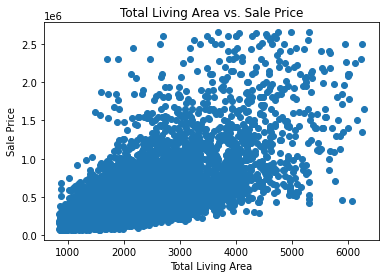

In [32]:
import matplotlib.pyplot as plt

# create scatter plot
plt.scatter(df['TOT_LVG_AREA'], df['SALE_PRC'])

# set plot title and axis labels
plt.title('Total Living Area vs. Sale Price')
plt.xlabel('Total Living Area')
plt.ylabel('Sale Price')

# display plot
plt.show()

There is a positive correlation between these two features.

In this question you will hard code Simple Linear Regression (SLM). There is some starter code provided. But you are to provide the functionality for the following functions:

`cost()` - This returns the MSE:

$MSE(m, b) = 1/N \sum_{i=1}^N (y_i - \hat{y})^2$ where $ \hat{y} = mx_i + b$

Use `np.power()`.

<br>

`gradient()` - This return the gradient with respect to `m` and `b`:

$  \nabla MSE(m, b)_m = \frac{-2}{N} * \sum_{i=1}^N (y_i - \hat{y})x_i$

$  \nabla MSE(m, b)_b = \frac{-2}{N} * \sum_{i=1}^N (y_i - \hat{y})$

Hint: Use `np.sum()` for the summation 

<br>

`train()` - you have to update the `self.m` and the `self.b` parameters using the gradient descent formulation:

$ m = m - \alpha MSE(m, b)_m$

$ b = b - \alpha MSE(m, b)_b$

Repeat this until the cost between iterations is less that `self.tol` (look at code below). $\alpha$ is an input when creating the object.

<br>

`rsq()` - Return the $R^2$ value of the model. This value shows how well the data fits the regression model, the closer to 1 or -1 the better:

$R^2 = \frac{\sum_{i=1}^N(y_i - \hat{y}_i)^2}{\sum_{i=1}^N(y_i - \bar{y})^2}$

Where $\bar{y}$ is the average of $y$.

In [36]:
class SimpleLinearRegression:
  def __init__(self, X, y, tol, alpha):
    self.X = X # input data/ features
    self.n = len(X) # length of the given data
    self.y = y # output value we want o predict/model
    self.tol = tol # Tolerance, we train until the cost between the previous two iterations is less than self.tol
    self.alpha = alpha # step size for gradient descent
    self.m = np.random.rand() # Randomly initialize m
    self.b = np.random.rand() # Randomly initialize b
    self.costs = [] # storing the costs of the model as we train it
  
  def cost(self):
    # TODO Calculate y_hat and then return the MSE
    y_hat = self.m * self.X + self.b
    MSE = (1/self.n) * (np.sum(self.y - y_hat)**2)
    return MSE

  def gradient(self):
    # TODO Calculate y_hat
    y_hat = self.m * self.X + self.b
    # Calcuate the gradient wrt to m
    m_gradient = (-2/self.n) * np.sum((self.y - y_hat)*self.X)
    # Calcuate the gradient wrt to b
    b_gradient = (-2/self.n) * np.sum(self.y - y_hat)
    return m_gradient, b_gradient

  def train(self):
    while(True):
      m_g, b_g = self.gradient()
      # TODO Fill this out based on the gradient descent formulation (look at the text cell above)
      self.m = self.m - self.alpha * m_g
      self.b = self.b - self.alpha * b_g
      # Append the cost to the the self.costs list
      cost = self.cost()
      self.costs.append(cost)

      # Check to see if the difference between the costs of the 2 most rescent iterations is less than or equal to self.tol
      # NOTE: This check should occur only after you have done more than 2 iterations
      if len(self.costs) > 2 and abs(self.costs[-1] - self.costs[-2]) <= self.tol:
          break
  
  def rsq(self):
    # TODO Calculate y_hat
    y_hat = self.m * self.X + self.b
    # Return the rsq using the equation above
    rsq = rsq = 1 - np.sum(np.power(self.y - y_hat, 2)) / np.sum(np.power(self.y - np.mean(self.y), 2))
    return rsq 

Run the following cell to get an `slm` object, notice how `m` and `b` are random

In [37]:
slm = SimpleLinearRegression(x, y, 0.01, 0.001)
slm.m, slm.b

(0.9632301121253973, 0.5501826756091786)

Call the `train` method

In [38]:
slm.train()

See how the values for `m` and `b`changed

In [39]:
slm.m, slm.b

(0.6744888756433016, 0.013363557346452582)

Plot this line of best fit alongside the scatter plot for `TOT_LVG_AREA` and `SALE_PRC`.

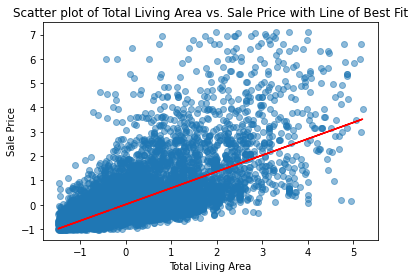

In [40]:
import matplotlib.pyplot as plt

# Create scatter plot of data
plt.scatter(x, y, alpha=0.5)

# Add line of best fit to plot
plt.plot(x, slm.m * x + slm.b, color='red')

# Add labels and title to plot
plt.xlabel('Total Living Area')
plt.ylabel('Sale Price')
plt.title('Scatter plot of Total Living Area vs. Sale Price with Line of Best Fit')

# Show plot
plt.show()

Return the `rsq` for your model?

**What does the `rsq` value tell you about the data?**

In [42]:
# Print the rsq value
print(slm.rsq())

0.4450603215911124


# Q2: Simple Linear Regression in `Sklearn`

Create a `LinearRegression` model using `sklearn` using the `.fit()` method

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [43]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
lr_model = LinearRegression()

# Fit the model to your data
lr_model.fit(x, y)

LinearRegression()

Use the `.score()` method to return the R sqaured value for this model

In [44]:
# calculate R squared value for sklearn model
sk_rsq = lr_model.score(x, y)
print("R squared value for sklearn model:", sk_rsq)

R squared value for sklearn model: 0.44529057237488623


Return the `m` and `b` values for this model created with sklearn (look at the documentation to see how to do this)

In [45]:
m = lr_model.coef_[0]
b = lr_model.intercept_
print("m:", m)
print("b:", b)

m: [0.66730096]
b: [-6.53275696e-17]


Plot the line of best fit from above as well as the one you hard coded:

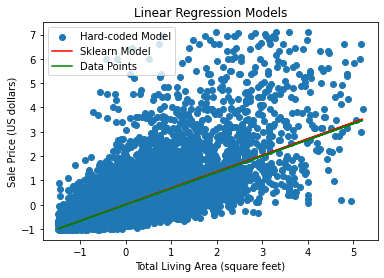

In [50]:
# Plot the scatter plot
plt.scatter(x, y)

# Plot the line of best fit from the hard-coded model
plt.plot(x, slm.m * x + slm.b, color='red')

# Plot the line of best fit from the sklearn model
plt.plot(x, lr_model.predict(x), color='green')

# Add labels and title
plt.xlabel('Total Living Area (square feet)')
plt.ylabel('Sale Price (US dollars)')
plt.title('Linear Regression Models')
plt.legend(['Hard-coded Model', 'Sklearn Model', 'Data Points'])
plt.show()

**Question: Why are these two lines different?**

Feel free to use google :)

The two lines are different because they were fit using different algorithms. The first line was fit using gradient descent, which is an iterative optimization algorithm that tries to minimize the mean squared error between the predicted values and the actual values. The second line was fit using ordinary least squares regression, which is a closed-form solution that directly computes the parameters that minimize the sum of the squared residuals between the predicted values and the actual values.

# Q3: Multiple Linear Regression in `Sklearn`

Now lets do the same idea but with multiple features. Here `X` will be the data for `'LND_SQFOOT',	'TOT_LVG_AREA',	'SPEC_FEAT_VAL',	'RAIL_DIST',	'OCEAN_DIST',	'WATER_DIST',	'CNTR_DIST',	'SUBCNTR_DI',	'HWY_DIST'` and we will be using it to predict `y` which is the price of the house.

In [51]:
X = df[['LND_SQFOOT',	'TOT_LVG_AREA',	'SPEC_FEAT_VAL',	'RAIL_DIST',	'OCEAN_DIST',	'WATER_DIST',	'CNTR_DIST',	'SUBCNTR_DI',	'HWY_DIST']]
X = (X - X.mean()) / X.std()
y = df['SALE_PRC']
y = (y - y.mean()) / y.std()

Train/fit a linear regression model on `X` and `y`

In [52]:
from sklearn.linear_model import LinearRegression

# create an instance of the LinearRegression class
mlr_model = LinearRegression()

# fit the model to the data
mlr_model.fit(X, y)

LinearRegression()

Print out the model coefficient/parameters

In [54]:
print(mlr_model.coef_)

coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': mlr_model.coef_})
print(coef_df)

[-0.00789818  0.59245506  0.15169119  0.09937606 -0.15919314 -0.04266036
 -0.29609678 -0.05445948  0.1322939 ]
         feature  coefficient
0     LND_SQFOOT    -0.007898
1   TOT_LVG_AREA     0.592455
2  SPEC_FEAT_VAL     0.151691
3      RAIL_DIST     0.099376
4     OCEAN_DIST    -0.159193
5     WATER_DIST    -0.042660
6      CNTR_DIST    -0.296097
7     SUBCNTR_DI    -0.054459
8       HWY_DIST     0.132294


**Question: According to the model, with feature is the most important for predicting house price?** Hint: a larger coefficient for a specific feature means that it is more important for predicting the independent variable.

TOT_LVG_AREA with a coefficent of 0.592455

# Q4: Logistic Regression in `Sklearn`

Lets train a model to predict noise exceeding an acceptable level (`avno60plus`) using `RAIL_DIST` and `HWY_DIST`.

Once again I am doing some feature scaling here but don't worry about this just yet :)

In [55]:
X1 = (df['RAIL_DIST'].values - np.mean(df['RAIL_DIST'].values)) / np.std(df['RAIL_DIST'].values) 
X1 = X1.reshape(-1, 1)
X2 = (df['HWY_DIST'].values - np.mean(df['HWY_DIST'].values)) / np.std(df['HWY_DIST'].values) 
X2 = X2.reshape(-1, 1)
X = np.hstack([X1, X2])
y = df['avno60plus'].values

Create a logistic regression model in sklearn and train/fit it to the data.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
log_reg = LogisticRegression()

# Fit model to data
log_reg.fit(X, y)

LogisticRegression()

Call the `.score()` method. **What does this tell you?**

In [57]:
# calculate R squared value for sklearn model
sk_rsq = log_reg.score(X, y)
print("R squared value for sklearn model:", sk_rsq)

R squared value for sklearn model: 0.9850703416594889


**Question: According to the model, what is the most important feature, `RAIL_DIST` or  `HWY_DIST` when it comes to modelling noise exceeding an acceptable level?**

In [58]:
print(log_reg.coef_)

[[-2.31512335 -0.23095189]]


`RAIL_DIST`

What to expect for next class:

- Imputing missing values
- Feature Scaling
- How to evaluate models

All of this is possible within sklearn so next class will be far more coding related. 

More specifically we will cover the ideas of a training and test set, confusion matrix, normalizing and standardizing data, and a few more!